# Adult income (renda adulta)

A renda anual de um indivíduo é resultado de vários fatores.  Intuitivamente pode-se pensar em nível de educação, idade,  ocupação etc.

Este é um conjunto de dados  disponibilizado na platafor kaggle, sendo encontrado no endereço abaixo

[https://www.kaggle.com/wenruliu/adult-income-dataset](https://www.kaggle.com/wenruliu/adult-income-dataset)

**Informações sobre o dataset**
O conjunto de dados possuem 15 colunas
A variável alvo é a renda (income) em que se deseja saber se a reda anual de determinado indivíduo adulto é maior que 50K ou menor iguak que 50K dadas certas informações pessoais do indivíduo.

Descrição das variáveis

1.  Age (idade) - **variável numérica;**
2.  workclass (Classe de Trabalho) - **variável categórica:** Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked;
3.  fnlwgt (Peso Final, número de pessoas que o censo acredita que esse indivíduo representa) - **variável numérica;**
4.  education (educação) - **variável categórica**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool;
5.  education-num -(número relacionado a educação) - variável numérica
6.  marital-status (estado civil) - **variável categórica** : Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
7.  occupation (profissão) - **variável categórica**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces;
8.  relationship (relacionamento) -  **variável categórica**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
9.  race (raça) - **variável categórica**: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black;
10.  sex (sexo) - **variável categórica:** Female, Male.;
11.  capital-gain (ganhos) - **variável numérica;**
12.  capital-loss (despesas) -**variável numérica;**
13.  hours-per-week (horas trabalhadas por semana) - **variável numérica**
14.  native-country (país de origem) - **variável categórica**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands;
15. income (renda) - **variável categórica**



Reconhecimentos
Esse conjunto de dados chamado "adulto" é encontrado no repositório de aprendizado de máquina da UCI
http://www.cs.toronto.edu/~delve/data/adult/desc.html

A descrição detalhada do conjunto de dados pode ser encontrada na documentação original da UCI
http://www.cs.toronto.edu/~delve/data/adult/adultDetail.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
from scipy import stats
from sklearn import preprocessing

In [2]:
df = pd.read_csv('adult.csv')
df.head(3)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K


### Tratamento dos dados

In [3]:
def remove_espacos (df):
    #Remove espaços no começo e no fim das srings
    dfnovo = df.apply(lambda x: x.apply(lambda y: y.strip() if type(y) == type('') else y), axis=0)
    return dfnovo

In [4]:
def troca_int_npnan(df):
    #troca as '?' por np.nan
    dfnovo = df.apply(lambda x: x.replace('?',np.nan))
    return dfnovo

In [5]:
df = remove_espacos(df)
df = troca_int_npnan(df)

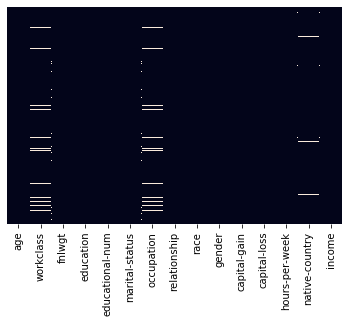

In [6]:
#Visualização geral dos dados faltantes
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [7]:
#Verificando quantidade de valores faltantes
df['workclass'].isna().value_counts()

False    46043
True      2799
Name: workclass, dtype: int64

In [8]:
#Verificando frequência dos valores do atributo workclass
df['workclass'].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [9]:
#Verificando quantidade de valores faltantes
df['occupation'].isna().value_counts()

False    46033
True      2809
Name: occupation, dtype: int64

In [10]:
#Verificando frequência dos valores do atributo workclass
df['occupation'].value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [11]:
df['native-country'].isna().value_counts()

False    47985
True       857
Name: native-country, dtype: int64

In [12]:
#Verificando frequência dos valores do atributo workclass
df['native-country'].value_counts()

United-States                 43832
Mexico                          951
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Nicaragua                        49
Greece                           49
Peru                             46
Ecuador                     

In [13]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [14]:
df[['workclass','native-country']] = imp.fit_transform(df[['workclass','native-country']])

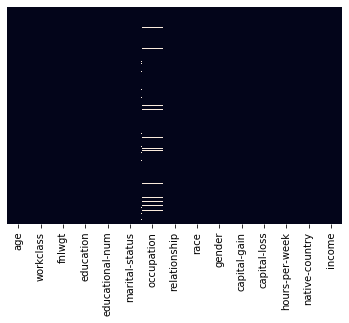

In [15]:
#Visualização geral dos dados faltantes
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [16]:
aux_list_most_freq = pd.DataFrame(df['occupation'].value_counts())

In [17]:
Occupation_list_most_frequently = list(aux_list_most_freq.index[0:5])
Occupation_list_most_frequently

['Prof-specialty', 'Craft-repair', 'Exec-managerial', 'Adm-clerical', 'Sales']

In [18]:
import random

In [19]:
# Substitui os valores np.nan pelos valores da lista definida em Occupation_list_most_frequently (5 valores mais frequentes)
# de forma aleatória
df['occupation'] = df['occupation'].fillna(random.choice(Occupation_list_most_frequently))

In [20]:
# Substitui os valores np.nan pelos valores existentes da coluna df['occupation'] a escolha é feito de forma aleatória
#df['occupation'] = df['occupation'].fillna(random.choice(df['occupation'].values.tolist()))

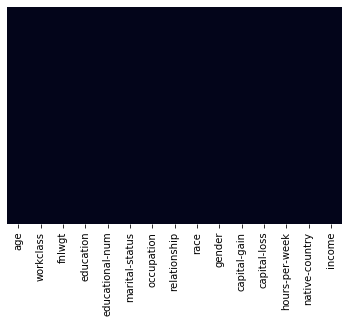

In [21]:
#Visualização geral dos dados faltantes
#Não existe mais valores faltates
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [22]:
df_plot = df.copy()

In [23]:
df['income'] = pd.get_dummies(df['income'], drop_first=1)
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,Private,103497,Some-college,10,Never-married,Sales,Own-child,White,Female,0,0,30,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


## Análise Exploratória

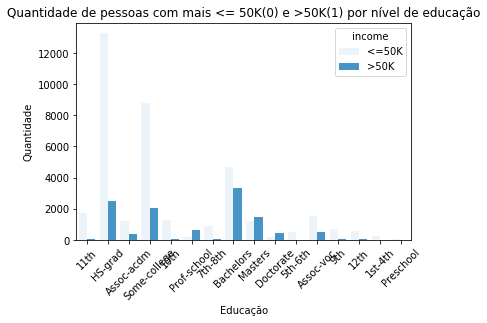

In [24]:
p=sns.countplot(x='education', hue='income',data=df_plot, color="#3498db")
plt.title('Quantidade de pessoas com mais <= 50K(0) e >50K(1) por nível de educação')
p.set_xticklabels(p.get_xticklabels(), rotation=45)
plt.ylabel('Quantidade')
plt.xlabel('Educação')
plt.show()

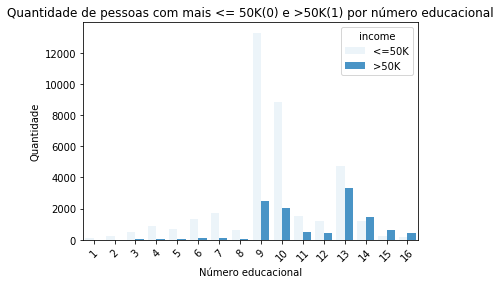

In [25]:
p=sns.countplot(x='educational-num', hue='income',data=df_plot, color="#3498db")
plt.title('Quantidade de pessoas com mais <= 50K(0) e >50K(1) por número educacional')
p.set_xticklabels(p.get_xticklabels(), rotation=45)
plt.ylabel('Quantidade')
plt.xlabel('Número educacional')
plt.show()

In [26]:
df_educational_num = df.groupby(by=['educational-num','income']).agg({'income': 'count'})
df_educational_num

income
educational-num income        
1               0           82
                1            1
2               0          239
                1            8
3               0          482
                1           27
4               0          893
                1           62
5               0          715
                1           41
6               0         1302
                1           87
7               0         1720
                1           92
8               0          609
                1           48
9               0        13281
                1         2503
10              0         8815
                1         2063
11              0         1539
                1          522
12              0         1188
                1          413
13              0         4712
                1         3313
14              0         1198
                1         1459
15              0          217
                1          617
16              0          163
                1          431

In [27]:
df_education = df.groupby(by=['education','income']).agg({'income': 'count'})
df_education

income
education    income        
10th         0         1302
             1           87
11th         0         1720
             1           92
12th         0          609
             1           48
1st-4th      0          239
             1            8
5th-6th      0          482
             1           27
7th-8th      0          893
             1           62
9th          0          715
             1           41
Assoc-acdm   0         1188
             1          413
Assoc-voc    0         1539
             1          522
Bachelors    0         4712
             1         3313
Doctorate    0          163
             1          431
HS-grad      0        13281
             1         2503
Masters      0         1198
             1         1459
Preschool    0           82
             1            1
Prof-school  0          217
             1          617
Some-college 0         8815
             1         2063

In [28]:
#lista_index confirma que as variáveis educational-num e education são equivalentes e mostra sua equivalência 

lista_index = []

for item in df.education.unique():
    for item1 in np.arange(1,17):
        var = df_educational_num.loc[item1]==df_education.loc[item]
        if var['income'][0] == True:
            lista_index.append((item1, item))

lista_index

[(7, '11th'),
 (9, 'HS-grad'),
 (12, 'Assoc-acdm'),
 (10, 'Some-college'),
 (6, '10th'),
 (15, 'Prof-school'),
 (4, '7th-8th'),
 (13, 'Bachelors'),
 (14, 'Masters'),
 (16, 'Doctorate'),
 (3, '5th-6th'),
 (11, 'Assoc-voc'),
 (5, '9th'),
 (8, '12th'),
 (2, '1st-4th'),
 (1, 'Preschool')]

In [29]:
#Então a coluna 'education' que é categórica pode ser excluida
#df.drop('education', axis=1, inplace=True)

In [30]:
fnlwgt_1 =[df.iloc[i].fnlwgt for i in range(df.shape[0]) if df.iloc[i].income == 1]
fnlwgt_0 =[df.iloc[i].fnlwgt for i in range(df.shape[0]) if df.iloc[i].income == 0]

In [31]:
tot_1 = sum(fnlwgt_1)
tot_0 = sum(fnlwgt_0)

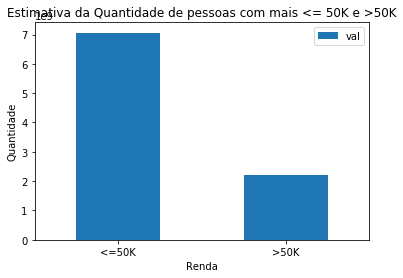

In [32]:
df_tot = pd.DataFrame({'tot':['<=50K', '>50K'], 'val':[tot_0, tot_1]})
ax = df_tot.plot.bar(x='tot', y='val', rot=0)

plt.title('Estimativa da Quantidade de pessoas com mais <= 50K e >50K')
p.set_xticklabels(p.get_xticklabels(), rotation=45)
plt.ylabel('Quantidade')
plt.xlabel('Renda')
plt.show()

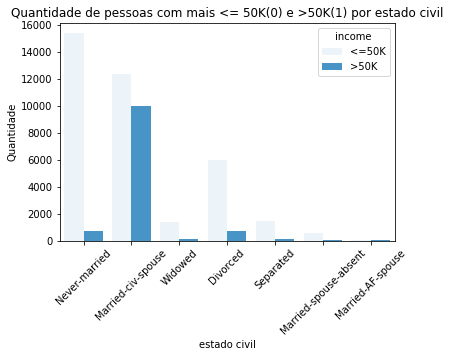

In [33]:
p=sns.countplot(x='marital-status', hue='income',data=df_plot, color="#3498db")
plt.title('Quantidade de pessoas com mais <= 50K(0) e >50K(1) por estado civil')
p.set_xticklabels(p.get_xticklabels(), rotation=45)
plt.ylabel('Quantidade')
plt.xlabel('estado civil')
plt.show()

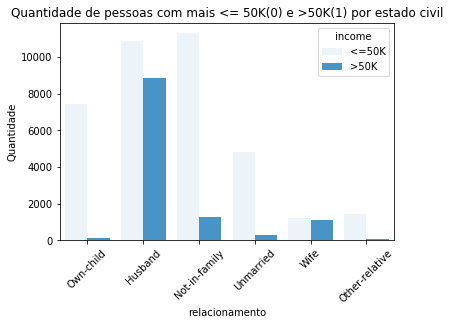

In [34]:
p=sns.countplot(x='relationship', hue='income',data=df_plot, color="#3498db")
plt.title('Quantidade de pessoas com mais <= 50K(0) e >50K(1) por estado civil')
p.set_xticklabels(p.get_xticklabels(), rotation=45)
plt.ylabel('Quantidade')
plt.xlabel('relacionamento')
plt.show()

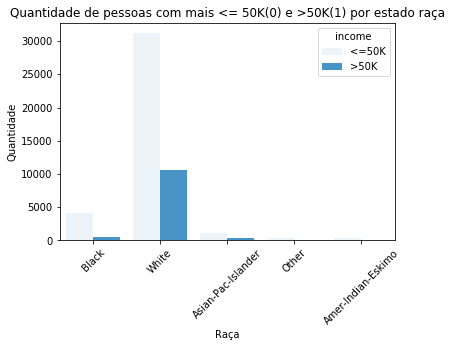

In [35]:
p=sns.countplot(x='race', hue='income',data=df_plot, color="#3498db")
plt.title('Quantidade de pessoas com mais <= 50K(0) e >50K(1) por estado raça')
p.set_xticklabels(p.get_xticklabels(), rotation=45)
plt.ylabel('Quantidade')
plt.xlabel('Raça')
plt.show()

In [36]:
list_hours_1 = pd.DataFrame([df.iloc[i]['hours-per-week'] for i in range(df.shape[0]) if df.iloc[i]['income']==1])
list_hours_1.columns =['hours-per-week']

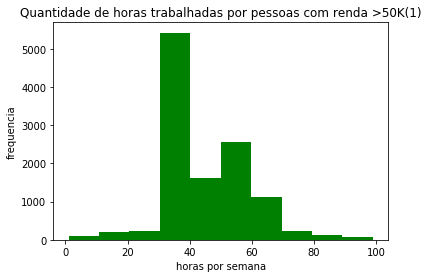

In [37]:
p=plt.hist(x='hours-per-week', bins=10, data=list_hours_1, color="g")
plt.title('Quantidade de horas trabalhadas por pessoas com renda >50K(1)')
plt.ylabel('frequencia')
plt.xlabel('horas por semana')
plt.show()

In [38]:
list_hours_0 = pd.DataFrame([df.iloc[i]['hours-per-week'] for i in range(df.shape[0]) if df.iloc[i]['income']==0])
list_hours_0.columns =['hours-per-week']

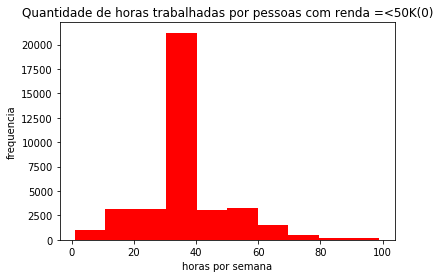

In [39]:
p=plt.hist(x='hours-per-week', bins=10, data=list_hours_0, color="r")
plt.title('Quantidade de horas trabalhadas por pessoas com renda =<50K(0)')
plt.ylabel('frequencia')
plt.xlabel('horas por semana')
plt.show()

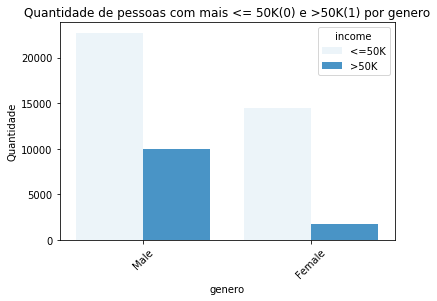

In [40]:
p=sns.countplot(x='gender', hue='income',data=df_plot, color="#3498db")
plt.title('Quantidade de pessoas com mais <= 50K(0) e >50K(1) por genero')
p.set_xticklabels(p.get_xticklabels(), rotation=45)
plt.ylabel('Quantidade')
plt.xlabel('genero')
plt.show()

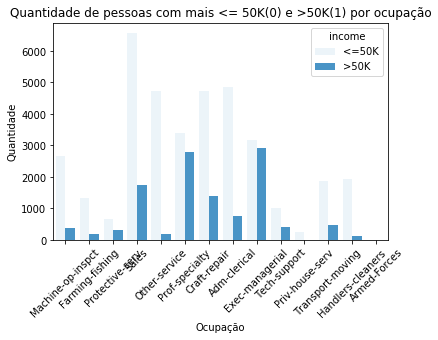

In [41]:
p=sns.countplot(x='occupation', hue='income',data=df_plot, color="#3498db")
plt.title('Quantidade de pessoas com mais <= 50K(0) e >50K(1) por ocupação')
p.set_xticklabels(p.get_xticklabels(), rotation=45)
plt.ylabel('Quantidade')
plt.xlabel('Ocupação')
plt.show()

## Conclusões
-A maior parcela das pessoas que possuem renda maior que 50K possuem bacharelado completo sendo seguida por pessoas que possuem  ensino médio
- A maior concentração de pessoas dessa pesquisa possui ensino médio completo
- Esse dado é desbalanceado???? 
- Pessoas casadas e sem filho biológico possuem mais chances de possuirem renda >50K
- Pessoas do sexo masculino possuem mais chances possuirem renda >50K
- Pessoas com o cargo de 'Prof-spacialty' e exec-managerial possuem mais chances de possuir renda >50K
- Existe uma grande quantidade de pessoas que trabalham de 30 a 40h por semana e ganham ou não mais que 50K porém existe uma maior concentração de pessoas que ganhar mais que 50K que trabalham entre 40 e 50 horas semanais.


## Análise das variáveis de entrada
### Análise da correlação entre as variáveis numéricas

In [42]:
df_plot.corr()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076628,0.030940,0.077229,0.056944,0.071558
fnlwgt,-0.076628,1.000000,-0.038761,-0.003706,-0.004366,-0.013519
educational-num,0.030940,-0.038761,1.000000,0.125146,0.080972,0.143689
capital-gain,0.077229,-0.003706,0.125146,1.000000,-0.031441,0.082157
capital-loss,0.056944,-0.004366,0.080972,-0.031441,1.000000,0.054467
hours-per-week,0.071558,-0.013519,0.143689,0.082157,0.054467,1.000000


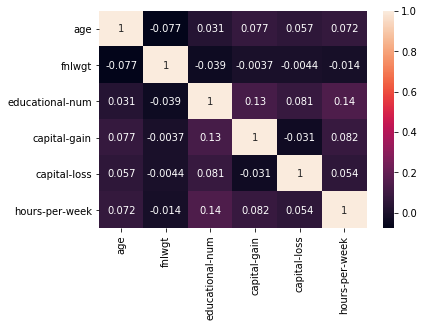

In [43]:
ax = sns.heatmap(df_plot.corr(), annot=True)

### Análise da correlação entre as variáveis categóricas

In [44]:
# número v de cramer utilizada para o cálculo de correlação entre variáveis categóricas
# FONTE: https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [45]:
category_features = df.select_dtypes(include='object').columns

In [46]:
cramers_v_line = []
for col1 in category_features:
    for col2 in category_features:  
        v = cramers_v(df[col1], df[col2])
        cramers_v_line.append(v)

cramers_v_line = np.array(cramers_v_line).reshape(8,8)
cramers_v_line = pd.DataFrame(cramers_v_line)
cramers_v_line.columns = category_features
cramers_v_line.index = category_features
cramers_v_line

,workclass,education,marital-status,occupation,relationship,race,gender,native-country
workclass,1.000000,0.100417,0.076682,0.201324,0.089675,0.056095,0.141133,0.031846
education,0.100417,1.000000,0.089234,0.190885,0.121423,0.070852,0.091589,0.125899
marital-status,0.076682,0.089234,1.000000,0.126998,0.488059,0.082269,0.459324,0.057134
occupation,0.201324,0.190885,0.126998,1.000000,0.173657,0.074654,0.421896,0.063854
relationship,0.089675,0.121423,0.488059,0.173657,1.000000,0.096989,0.646470,0.072244
race,0.056095,0.070852,0.082269,0.074654,0.096989,1.000000,0.113610,0.396380
gender,0.141133,0.091589,0.459324,0.421896,0.646470,0.113610,0.999954,0.052546
native-country,0.031846,0.125899,0.057134,0.063854,0.072244,0.396380,0.052546,1.000000


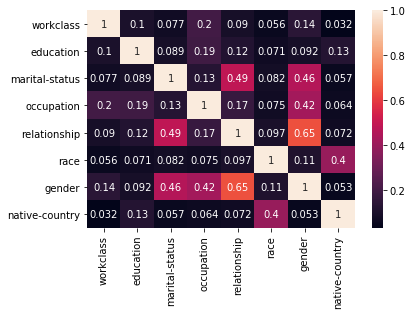

In [47]:
ax = sns.heatmap(cramers_v_line, annot=True)

### Análise de correlação entre variáveis numéricas e a  variáveis categórica

In [48]:
#Correlação biserial com a saída
numerical_features = list(df.select_dtypes(include='int64').columns)
numerical_features.append('income')

In [49]:
b_corr_saida = []

for col in numerical_features:
    b  = stats.pointbiserialr(df[col], df['income'])
    bi =[b[0],b[1]]
    b_corr_saida.append(bi)

b_cor_saida  = np.array(b_corr_saida).reshape(7,2)
b_corr_saida = pd.DataFrame(b_corr_saida)
b_corr_saida.columns = ['corretalion', 'p-valor']
b_corr_saida.index = numerical_features
b_corr_saida

,corretalion,p-valor
age,0.230369,0.000000e+00
fnlwgt,-0.006339,1.612498e-01
educational-num,0.332613,0.000000e+00
capital-gain,0.223013,0.000000e+00
capital-loss,0.147554,8.543599e-236
hours-per-week,0.227687,0.000000e+00
income,1.000000,0.000000e+00


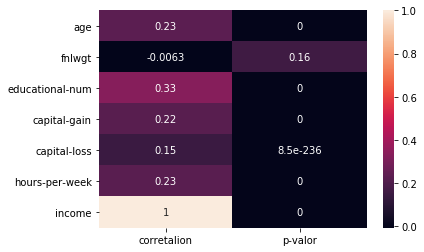

In [50]:
ax = sns.heatmap(b_corr_saida, annot=True)

### Transformação de variáveis categóricas

In [51]:
#primeiro utilizando o label encoder
from sklearn import preprocessing
le_workclass = preprocessing.LabelEncoder()
le_education = preprocessing.LabelEncoder()
le_marital = preprocessing.LabelEncoder()
le_occupation = preprocessing.LabelEncoder()
le_relationship = preprocessing.LabelEncoder()
le_race = preprocessing.LabelEncoder()
le_gender = preprocessing.LabelEncoder()
le_native = preprocessing.LabelEncoder()

In [52]:
df['workclass'] = le_workclass.fit_transform(df['workclass'])
df['education'] = le_workclass.fit_transform(df['education'])
df['marital-status'] = le_marital.fit_transform(df['marital-status'])
df['occupation'] = le_occupation.fit_transform(df['occupation'])
df['relationship'] = le_relationship.fit_transform(df['relationship'])
df['race'] = le_race.fit_transform(df['race'])
df['gender'] = le_gender.fit_transform(df['gender'])
df['native-country'] = le_native.fit_transform(df['native-country'])

In [53]:
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,3,226802,1,7,4,6,3,2,1,0,0,40,38,0
1,38,3,89814,11,9,2,4,0,4,1,0,0,50,38,0
2,28,1,336951,7,12,2,10,0,4,1,0,0,40,38,1
3,44,3,160323,15,10,2,6,0,2,1,7688,0,40,38,1
4,18,3,103497,15,10,4,11,3,4,0,0,0,30,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,3,257302,7,12,2,12,5,4,0,0,0,38,38,0
48838,40,3,154374,11,9,2,6,0,4,1,0,0,40,38,1
48839,58,3,151910,11,9,6,0,4,4,0,0,0,40,38,0
48840,22,3,201490,11,9,4,0,3,4,1,0,0,20,38,0


## Obtenção do modelo e métricas do classificção obtida

In [135]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix

In [136]:
df.drop(columns = 'income').to_csv('X_tratado.csv', index=False)
df['income'].to_csv('y_tratado.csv', index=False)

In [137]:
X=df.drop(columns = 'income')
y=df['income']
gnb = GaussianNB()

In [138]:
cv_results = cross_validate(gnb, X, y, cv=3)
cv_results

{'fit_time': array([0.0769949 , 0.16598868, 0.11199474]),
 'score_time': array([0.04499412, 0.05199432, 0.06299806]),
 'test_score': array([0.79319452, 0.79276457, 0.79815725])}

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
y_pred = gnb.fit(X_train, y_train).predict(X_test)

In [140]:
tn,fp,fn,tp = confusion_matrix(y_test, y_pred).ravel()

In [141]:
 confusion_matrix(y_test, y_pred)

array([[10544,   594],
       [ 2408,  1107]], dtype=int64)

In [142]:
acuracia = (tp+tn)/(tp+tn+fn+fp)
acuracia

0.7951272776905753

In [143]:
precisao = tp/(tp+fp)
precisao

0.6507936507936508

In [145]:
sensibilidade = tp/(tp+fn)
sensibilidade

0.31493598862019917

Nesse caso, eu defini a métrica de precisão é mais relevante do que a de sensibilidade, uma vez que os danos de que se for afirmado que uma pessoa não receba mais que 50K anuais mas na verdade ela recebe.

Os próximos passos serão utilizar os dados já tratados nesse documento para tentar melhorar os resultados.